# 量子コンピューティングの基礎
### (2025/10/27 @ UTokyo Qiskit Fall Fest 2025 事前講習会)

# Exercise 0: 環境準備
はじめに、今回使用するライブラリをimportしておきましょう。
Qiskitに加えて、numpyライブラリをimportしておくと便利です。

In [1]:
import numpy as np

# Import the qiskit library
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

<hr>

```plot_histogram```関数を使って、量子状態の可視化をしてみましょう。
Qiskitでは量子状態はStatevectorとして管理されており、1量子ビットの場合長さは2です。

state_vector = Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


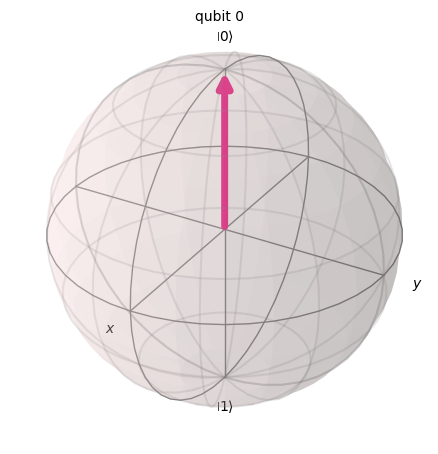

In [2]:
# 量子状態を初期化します

# Statevector([a, b]) は |ψ> = a|0> + b|1> を意味します
state_vector = Statevector([1, 0])
print("state_vector =", state_vector)

# ブロッホ球上に量子状態を表示します
plot_bloch_multivector(state_vector)

# Exercise 1: 量子状態を可視化してみよう
では、以下の画像はそれぞれどの量子状態を表しているでしょうか？
選択肢から正しいStatevectorを見つけてください。

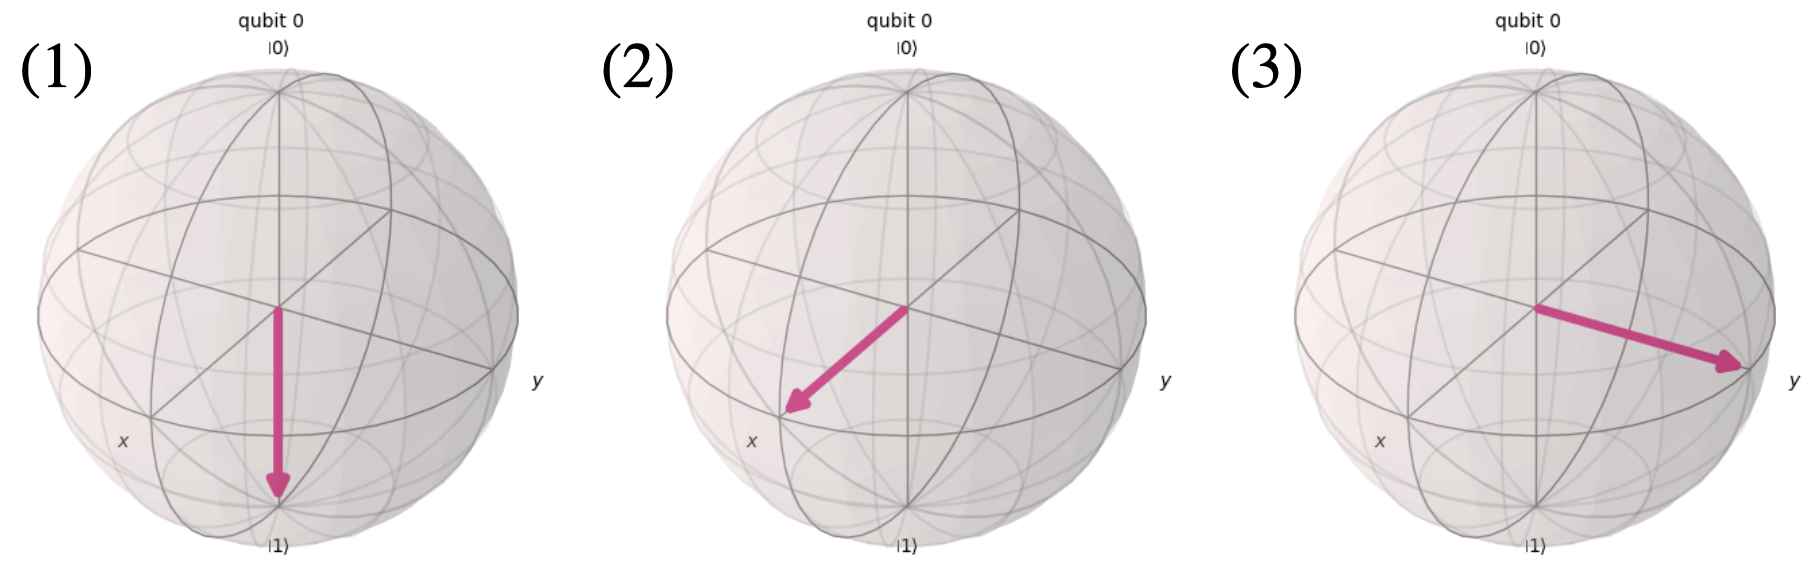

state_vector_1 = Statevector([0.+0.j, 0.+0.j],
            dims=(2,))


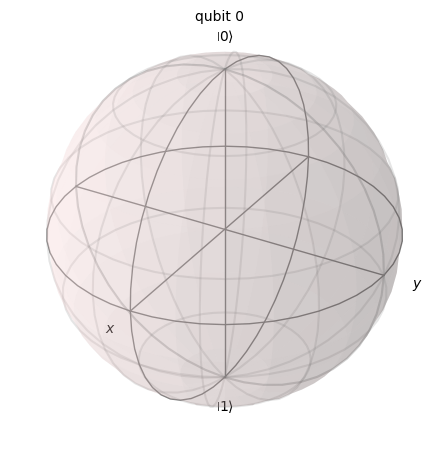

In [3]:
# (1)の量子状態として正しいのはどれでしょう？
# 1つだけコメントを外してください

state_vector_1 = Statevector([0, 0])
# state_vector_1 = Statevector([0, 1])
# state_vector_1 = Statevector([1, 0])
# state_vector_1 = Statevector([1, 1])

print("state_vector_1 =", state_vector_1)

# ブロッホ球上に量子状態を表示します
plot_bloch_multivector(state_vector_1)

state_vector_2 = Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


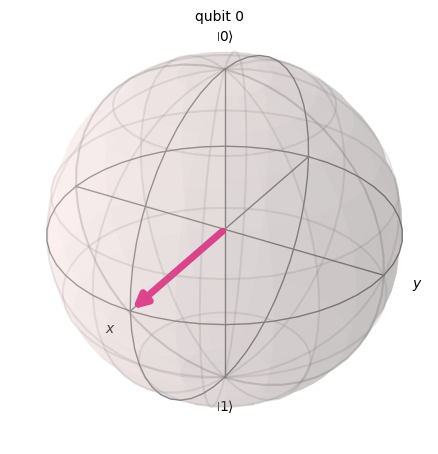

In [4]:
# (2)の量子状態として正しいのはどれでしょう？
# 1つだけコメントを外してください

sqrt_2 = 2**0.5 # ルート2
state_vector_2 = Statevector([ 1 / sqrt_2,  1 / sqrt_2])
# state_vector_2 = Statevector([ 1 / sqrt_2, -1 / sqrt_2])
# state_vector_2 = Statevector([-1 / sqrt_2,  1 / sqrt_2])
# state_vector_2 = Statevector([-1 / sqrt_2, -1 / sqrt_2])

print("state_vector_2 =", state_vector_2)

# ブロッホ球上に量子状態を表示します
plot_bloch_multivector(state_vector_2)

state_vector_3 = Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


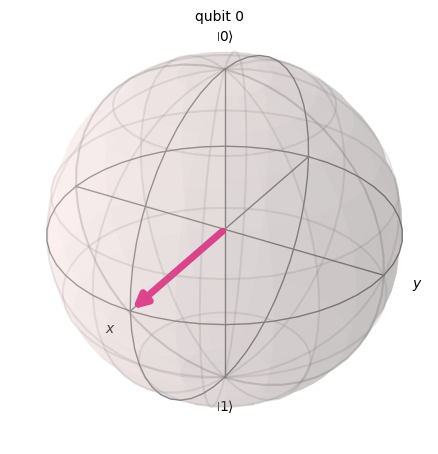

In [5]:
# (3)の量子状態として正しいのはどれでしょう？
# 1つだけコメントを外してください

sqrt_2 = 2**0.5 # ルート2
state_vector_3 = Statevector([1 / sqrt_2,  1  / sqrt_2])
# state_vector_3 = Statevector([1 / sqrt_2,  1j / sqrt_2])
# state_vector_3 = Statevector([1 / sqrt_2, -1  / sqrt_2])
# state_vector_3 = Statevector([1 / sqrt_2, -1j / sqrt_2])

print("state_vector_3 =", state_vector_3)

# ブロッホ球上に量子状態を表示します
plot_bloch_multivector(state_vector_3)

<hr>

量子回路を作り、量子状態にゲートを適用してみましょう。

1量子ビットの回路を作る場合、```qc = QuantumCircuit(1)```と書くだけでOKです。(1は量子ビット数に対応します)

以下に主要な量子ゲートの例を載せます。

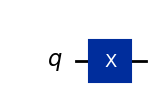

In [6]:
# 回路の作成
qc = QuantumCircuit(1)

# Pauliゲートは以下のように適用します。(0は量子ビットの番号を指します)
qc.x(0)
# qc.y(0)
# qc.z(0)

# 回転ゲートは以下のように適用します。(回転角、量子ビットの番号の順番で指定します)
# qc.rx(np.pi, 0)
# qc.ry(np.pi, 0)
# qc.rz(np.pi, 0)

# Hadamardゲートは以下のように適用します。(0は量子ビットの番号を指します)
# qc.h(0)

# 回路の描画
qc.draw(output="mpl")

# 量子状態を可視化する場合は以下のコメントを外してください
# plot_bloch_multivector(Statevector(qc))

# Exercise 2: 量子ゲートを合成してみよう
では、以下の画像に対応する量子回路を作ってみましょう
以下のような出力結果となるように、量子ゲートを並べてみましょう。

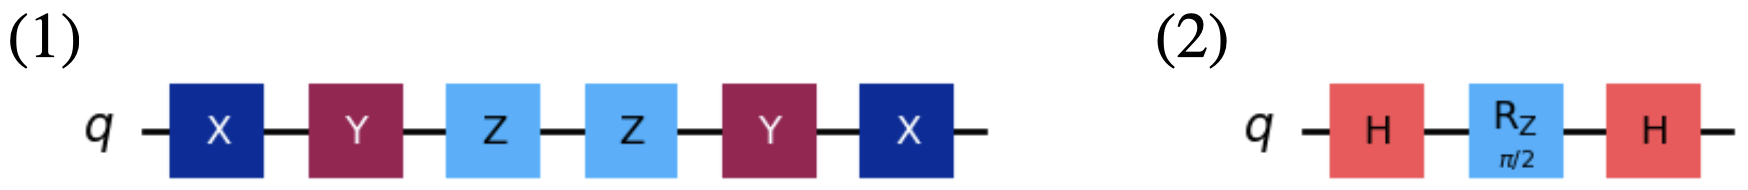

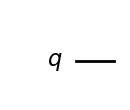

In [7]:
# 回路の作成
qc_1 = QuantumCircuit(1)

### ↓ (1)の見た目になるように量子ゲートを配置してみましょう ↓ ###



### ↑ ここまで ↑ ###

# 回路の描画
qc_1.draw(output="mpl")

# 量子状態を可視化する場合は以下のコメントを外してください
# plot_bloch_multivector(Statevector(qc_1))

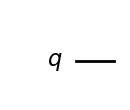

In [8]:
# 回路の作成
qc_2 = QuantumCircuit(1)

### ↓ (2)の見た目になるように量子ゲートを配置してみましょう ↓ ###



### ↑ ここまで ↑ ###

# 回路の描画
qc_2.draw(output="mpl")

# 量子状態を可視化する場合は以下のコメントを外してください
# plot_bloch_multivector(Statevector(qc_2))

<hr>

複数量子ビットからなる量子回路は```qc = QuantumCircuit(N)```のように書くことで作成できます。(Nは量子ビット数です)

1量子ビットの場合はブロッホ球による可視化ができましたが、2量子ビット以上ではそうも行きません。

少し原始的ではありますが、今回はStatevectorそのものを見る方法を採用しましょう。

Statevector(qc) = Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


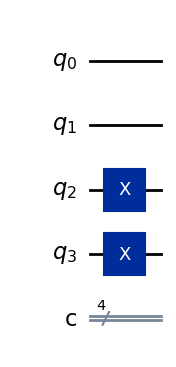

In [9]:
# 4量子ビットからなる回路を作成します。
N = 4
qc = QuantumCircuit(N, N)

# 試しに |0011> を作ってみます。初期状態は |0000> なので、右の2つにXゲートをかけることで作れます。
qc.x(2)
qc.x(3)

# statevectorを表示します。
# 1100(2進数) = 12番の要素のみ1となっていることが分かります。
print("Statevector(qc) =", Statevector(qc))

# 回路の描画
qc.draw(output="mpl")

シミュレータでサンプリングを行う場合、測定結果のシミュレーション結果をヒストグラムで表示することができます。

{'000': 509, '001': 515}


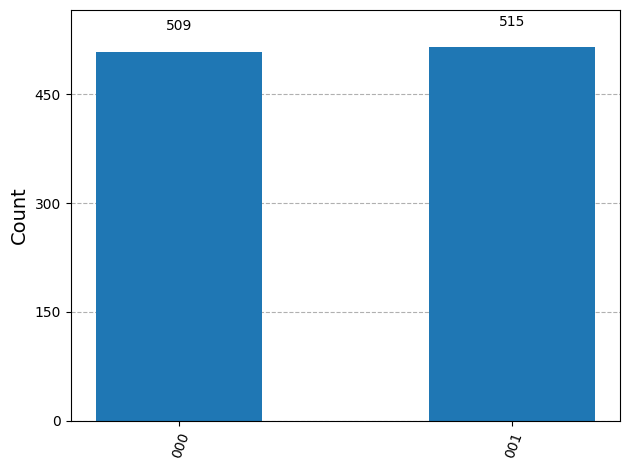

In [10]:
# (|000>+|100>)/√2 を作る回路をシミュレートします
N = 3
qc = QuantumCircuit(N, N)
qc.h(0)
qc.measure(range(N), range(N))


### ↓ 以下は量子回路のシミュレーションを行う部分です ↓ ###


# バックエンドにシミュレータを指定します
backend = AerSimulator()

# バックエンド向けに回路を最適化(transpile)します
transpiled_qc = generate_preset_pass_manager(backend=backend).run(qc)

# サンプラーを走らせて測定結果を得ます
sampling_job = Sampler(mode=backend).run([transpiled_qc])
sampling_result = sampling_job.result()

# 個別のカウント数を取得します
sample_counts = sampling_result[0].data.c.get_counts()
print(sample_counts)

# ヒストグラムとして可視化します
# ただし、Qiskitではビットの順番が入れ替わっているためラベルに注意しましょう
# 一番右の数字が q_0 に対応しているため、ラベルの|001>は|q_0 q_1 q_2> = |100> に対応します
plot_histogram(sample_counts)

複数量子ビットを持つ回路では、制御量子ゲートを使うことができます。

制御量子ゲートは制御ビットが |1> の場合のみゲートを適用する働きを持ちます。

例えば制御Xゲートは制御ビットが |0> のとき何もせず、|1> のとき標的ビットにXゲートをかけます(=反転させます)。

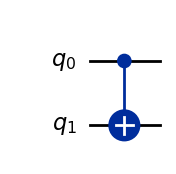

In [11]:
# 回路の作成
qc = QuantumCircuit(2)

# 制御Pauliゲートは以下のように適用します。(制御ビット、標的ビットの順番で指定します)
qc.cx(0, 1)
# qc.cy(0, 1)
# qc.cz(0, 1)

# 回転ゲートは以下のように適用します。(回転角、制御ビット、標的ビットの順番で指定します)
# qc.crx(np.pi, 0, 1)
# qc.cry(np.pi, 0, 1)
# qc.crz(np.pi, 0, 1)

# 制御Hadamardゲートも作ることができます。(制御ビット、標的ビットの順番で指定します)
# qc.ch(0, 1)

# 回路の描画
qc.draw(output="mpl")

```qc.ccx```等を使うことで、制御ビットを複数持つ量子ゲートを作ることもできます。

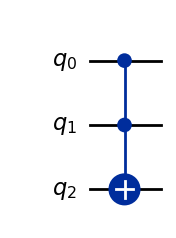

In [12]:
# 回路の作成
qc = QuantumCircuit(3)

# 複数制御Pauliゲートを作ることもできます (制御ビット、制御ビット、標的ビットの順番で指定します)
qc.ccx(0, 1, 2)
# qc.ccy(0, 1, 2)
# qc.ccz(0, 1, 2)

# 回路の描画
qc.draw(output="mpl")

制御Xゲートを組み合わせることで、SWAPゲートを作ることもできます。

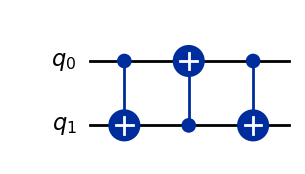

In [13]:
# 回路の作成
qc = QuantumCircuit(2)

# 制御Xゲートを3つ組み合わせることでSWAPゲートを作ることができます。
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)

# 回路の描画
qc.draw(output="mpl")

# Exercise 3: 重ね合わせ状態を作ってみよう
では、以下の量子状態を出力する回路を作ってみましょう。

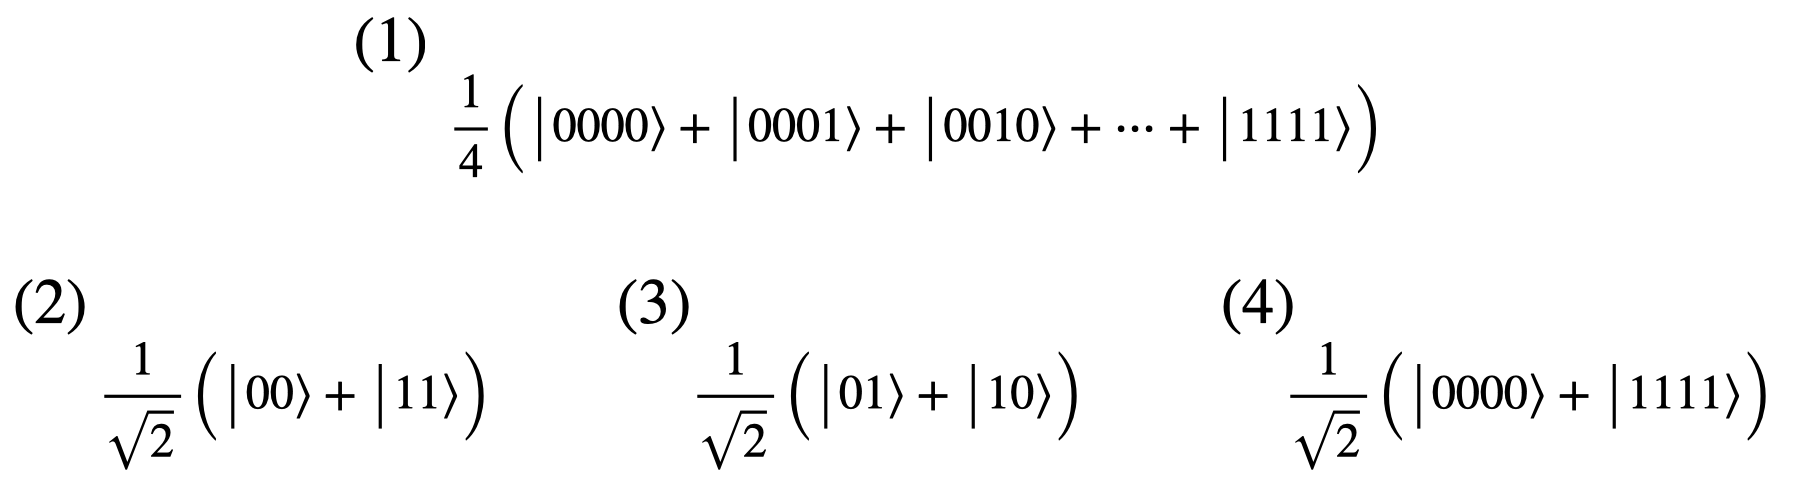

Statevector(qc_1) = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


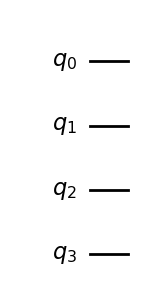

In [14]:
# 回路の作成
qc_1 = QuantumCircuit(4)

### ↓ (1)の量子状態 (|0000> + ... + |1111>) / 4 を作る量子回路を組んでみましょう ↓ ###



### ↑ ここまで ↑ ###

# 量子状態の出力
print("Statevector(qc_1) =", Statevector(qc_1))

# 回路の描画
qc_1.draw(output="mpl")

Statevector(qc_2) = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


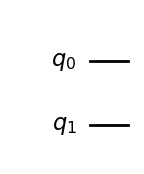

In [15]:
# 回路の作成
qc_2 = QuantumCircuit(2)

### ↓ (2)の量子状態 (|00> + |11>) / √2 を作る量子回路を組んでみましょう ↓ ###



### ↑ ここまで ↑ ###

# 量子状態の出力
print("Statevector(qc_2) =", Statevector(qc_2))

# 回路の描画
qc_2.draw(output="mpl")

Statevector(qc_3) = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


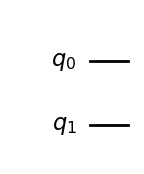

In [16]:
# 回路の作成
qc_3 = QuantumCircuit(2)

### ↓ (3)の量子状態 (|01> + |10>) / √2 を作る量子回路を組んでみましょう ↓ ###



### ↑ ここまで ↑ ###

# 量子状態の出力
print("Statevector(qc_3) =", Statevector(qc_3))

# 回路の描画
qc_3.draw(output="mpl")

Statevector(qc_4) = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


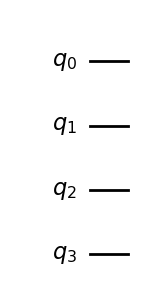

In [17]:
# 回路の作成
qc_4 = QuantumCircuit(4)

### ↓ (4)の量子状態 (|0000> + |1111>) / √2 を作る量子回路を組んでみましょう ↓ ###



### ↑ ここまで ↑ ###

# 量子状態の出力
print("Statevector(qc_4) =", Statevector(qc_4))

# 回路の描画
qc_4.draw(output="mpl")

# Challenge: 重ね合わせ状態を作ってみよう - Hard - 
ここまでスイスイ出来てしまった玄人向けに、チャレンジ問題を用意しました。

(1)については、状態ベクトルの中身が```[A, -A, iA, -iA]```になっていれば正解とします。

(全体にかかる数値はグローバル位相と呼ばれ、無視しても構いません。また、Qiskitではビットの順番が逆なため、真ん中の2つが入れ替わって表示されます)

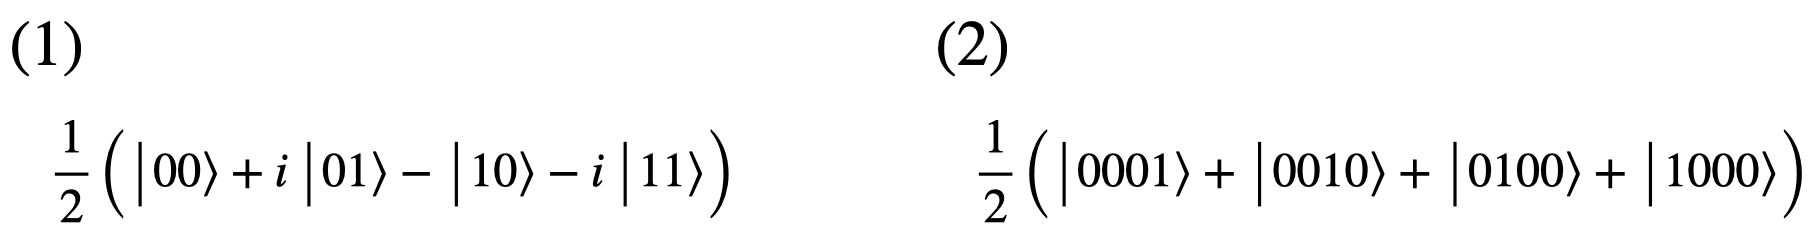

raw Statevector(qc_1) = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector(qc_1) / Statevector(qc_1)[0] = [np.complex128(1+0j), np.complex128(0j), np.complex128(0j), np.complex128(0j)]


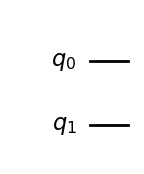

In [18]:
# 回路の作成
qc_1 = QuantumCircuit(2)

### ↓ (1)の量子状態 (|00> + i|01> - |10> - i|11>) / 2 を作る量子回路を組んでみましょう ↓ ###



### ↑ ここまで ↑ ###

# 量子状態の出力
print("raw Statevector(qc_1) =", Statevector(qc_1))

# Statevector(qc_1)[0]で割った結果
print("Statevector(qc_1) / Statevector(qc_1)[0] =", [Statevector(qc_1)[i] / Statevector(qc_1)[0] for i in range(4)])

# 回路の描画
qc_1.draw(output="mpl")

Statevector(qc_2) = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


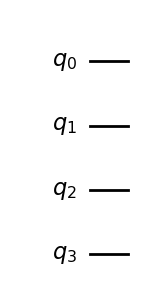

In [19]:
# 回路の作成
qc_2 = QuantumCircuit(4)

### ↓ (2)の量子状態 (|0001> + |0010> + |0100> + |1000>) / 2 を作る量子回路を組んでみましょう ↓ ###



### ↑ ここまで ↑ ###

# 量子状態の出力
print("Statevector(qc_2) =", Statevector(qc_2))

# 回路の描画
qc_2.draw(output="mpl")